In [ ]:
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)


file_id = '1004KxCA9-n6PqkIgJhQ7tmhU6E3kET_I'
destination = '/content/width.zip'
download_file_from_google_drive(file_id, destination)
# file_id = '1-2ppopy7ReKhpZXcyRKETf55XNlls60R'
# destination = '/content/weight.zip'
# download_file_from_google_drive(file_id, destination)

# !unzip -q weight.zip
!unzip -q width.zip -d /content/data
!ls

data  sample_data  width.zip


In [ ]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
from matplotlib import cm
import random
import string


def generateRandomSample(fontPath, picSize=(400*4,50*4)):
  im = Image.new('RGB', picSize, color=('#FFFFFF'))
  font = ImageFont.truetype(fontPath, size=80)
  draw_text = ImageDraw.Draw(im)
  draw_text.text(
      (5, 5),
      generate_random_string(20),
      font=font,
      fill='#000000')
  return im


def generate_random_string(length):
  letters = string.ascii_letters
  rand_string = ''.join(random.choice(letters) for i in range(length))
  # print("Random string of length", length, "is:", rand_string)
  return "ABCDEFGHIJKLMNOPQRSTUVWXY\nabcdefghijklmnopqrstuvwxyz"
  # return rand_string

In [ ]:
contrast = ('High Contrast', 'nonHC')
classificationArr = ('Display', 'Sans Serif', 'Serif', 'Monospaced', 'Handwritten')
weighArr = ('0ultralight', '1thin', '2light', '3regular', '4medium', '5semibold', '6bold', '7heavy', '8black')
weighArrStr = ('100', '200', '300', 'regular', '500', '600', '700', '800', '900')
widthArr = ('Condensed', 'Narrow', 'Wide')

category = widthArr

In [ ]:
import os


path_to_fonts     = "/content/data"
# path_to_save_data = "/content/drive/MyDrive/colabData/fontData/data/manualClassification/"
# path_to_all_fonts = "/content/drive/MyDrive/colabData/fontData/allFonts"

base = []
num_skipped = 0
cnt = 0
for folder_name in (category):
    folder_path = os.path.join(path_to_fonts, folder_name)
    for fname in os.listdir(folder_path):
        cnt += 1
        fpath = os.path.join(folder_path, fname)
        # print(fpath)
        # print('/content/drive/MyDrive/colabData/fontData/data/img/'+folder_name+'/'+fname[:-4]+'.png')
        # fullName = '/content/drive/MyDrive/colabData/fontData/data/img/'+folder_name+'/'+fname[:-4]+'.jpg'
        # for i in range(20):
        base.append({'name':fname, 'image':generateRandomSample(fpath)})
          # print("!")
    #     if cnt == 5:
    #       break
    # break
    print('Подготовлено шрифтов:', cnt)
# base

Подготовлено шрифтов: 38
Подготовлено шрифтов: 135
Подготовлено шрифтов: 166


In [ ]:
!pip install pyaztro

In [ ]:
import pyaztro
from google.colab import widgets
import ipywidgets
from IPython.display import display, clear_output
import pandas as pd

In [ ]:
classify = []

In [ ]:
def setup():
  global name
  img = base.pop()
  grid = widgets.Grid(1, len(category), header_row=True, header_column=True) 
  newsize = (400*4, 50*4)
  display(img['image'].resize(newsize))
  name = img['name']
  for (row, col) in grid:
    index = row*6+col
    # print("\n")
    # print("\n"+"Choose!"+"\n")
    display(button_list[index])

In [ ]:
# myIterator = 0
name = ''
def on_button_clicked(button):
  # Display the message within the output widget.
  # with output:
  global name
  clear_output()
  sign_name = str(button.description)
  # next = myIterator+1
  classify.append((name, sign_name))
  
  print(name, 'save as', sign_name)
  # with grid.output_to(0, 0):
  #   display(image_name[(1)]['image'].resize(newsize))
  setup()
  

In [ ]:
# category = ['Display', 'Handwritten', 'Monospased', 'Sans Serif', 'Serif']
# category = ['High Contrast', 'None High Contrast']
button_list = []
for i in range(0,len(category)):
  button = ipywidgets.widgets.Button(description=category[i])
  button.on_click(on_button_clicked)
  button_list.append(button)  
# def a():
#   setup()

BRRRTrial-Skrrt.otf save as Wide


,,


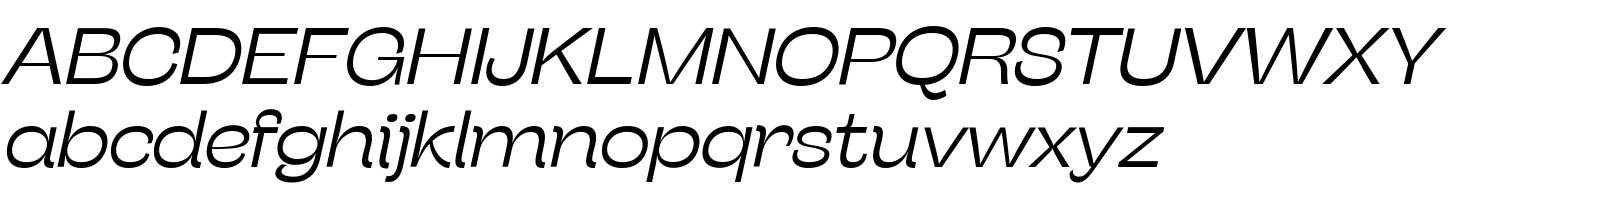

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='Condensed', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='Narrow', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='Wide', style=ButtonStyle())

<IPython.core.display.Javascript object>

In [ ]:
setup()

In [ ]:
print('Caunt of clicks {}'.format(len(classify)))
classify

Caunt of clicks 6


[('StingerWideTrial-Thin.ttf', 'Condensed'),
 ('StingerWideTrial-Heavy.ttf', 'Narrow'),
 ('RFDewiExpanded-BlackItalic.ttf', 'Wide'),
 ('RFDewiExpanded-Bold.ttf', 'Condensed'),
 ('Micra.otf', 'Narrow'),
 ('BRRRTrial-Skrrt.otf', 'Wide')]

## Create DataBase

In [ ]:
ratio = [1]
num_skipped = 0
cnt = [0]*len(classify)
for fname in classify:
  if fname[0] in os.listdir(path_to_all_fonts):
    # cnt += 1
    fpath = os.path.join(path_to_save_data, fname[0])
    folder_name = fname[1]
    # print(fpath)
    os.replace(fpath, path_to_save_data+folder_name+'/'+fname[0])
    # print(category.index(folder_name))
    cnt[category.index(folder_name)] += 1
for idx, className in enumerate(category):
  print('Подготовлено шрифтов типа {}: {} штук'.format(className, cnt[idx]))

4
4
2
4
4
Подготовлено шрифтов типа Display: 0 штук
Подготовлено шрифтов типа Sans Serif: 0 штук
Подготовлено шрифтов типа Serif: 1 штук
Подготовлено шрифтов типа Monospaced: 0 штук
Подготовлено шрифтов типа Handwritten: 4 штук
